In [1]:
# Load pickled data
import matplotlib.pyplot as plt
import pickle, cv2, csv, os, time
import numpy as np
from numpy import newaxis
from random import randint
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from matplotlib import gridspec
# Visualizations will be shown in the notebook.
%matplotlib inline

In [2]:
img = cv2.imread('/Users/dc/DeepLearning/kaggle/train/Type_1/0.jpg')
img.shape
#scaling removes data. not good.
img1 = cv2.imread('/Users/dc/DeepLearning/kaggle/train/Type_1/10.jpg')
img1.shape

(4128, 3096, 3)

In [53]:
import os

current_path = os.getcwd()
print (current_path)
train_path1 = current_path + "/train/Type_1/"
train_path2 = current_path + "/train/Type_2/"
train_path3 = current_path + "/train/Type_3/"
test = current_path+"/test/"

path_list =[]
path_list.append(train_path1)
path_list.append(train_path2)
path_list.append(train_path3)
path_list.append(test)


size_dict= {}
for path in path_list:
    for root, dirs, files in os.walk(path, topdown=False):
        print ("path:",path,' numFiles:',len(files))
        for f in files:
            if f !='.DS_Store':
                #print ("path:",path," path+f:",path+f)
                img = cv2.imread(path+f)
                #print (img.shape)
                size_dict[img.shape[0]]=img.shape[1]
    print("path size_dict:",size_dict)
            

            

/Users/dc/DeepLearning/kaggle
path: /Users/dc/DeepLearning/kaggle/train/Type_1/  numFiles: 251
path size_dict: {3264: 2448, 4128: 3096, 2448: 3264, 3096: 4128, 4160: 3120, 640: 480}
path: /Users/dc/DeepLearning/kaggle/train/Type_2/  numFiles: 782
path size_dict: {3264: 2448, 4128: 3096, 2448: 3264, 3096: 4128, 4160: 3120, 640: 480, 3088: 4128}
path: /Users/dc/DeepLearning/kaggle/train/Type_3/  numFiles: 451
path size_dict: {3264: 2448, 4128: 2322, 2448: 3264, 3096: 4128, 4160: 3120, 640: 480, 3088: 4128}
path: /Users/dc/DeepLearning/kaggle/test/  numFiles: 512
path size_dict: {3264: 2448, 4128: 3096, 2448: 3264, 3096: 4128, 4160: 3120, 640: 480, 3088: 4128}


0.8
image.shape before roll: (3264, 2448, 3)
image.shape after roll: (3, 3264, 2448)
image_array: (3264, 2448, 3)


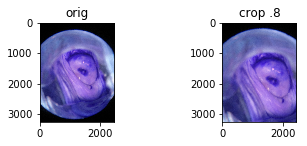

In [44]:
import scipy.ndimage as ndi
#crop test
img = cv2.imread('/Users/dc/DeepLearning/kaggle/train/Type_1/0.jpg')

height = img.shape[0]
width = img.shape[1]
trans_factor=0.1
#zoom range takes care of getting rid of black area; place with no information
zoom_range=[.8,.8]

y_offset = np.random.uniform(0,trans_factor*width)
x_offset = np.random.uniform(0,trans_factor*height)

offset = np.array([x_offset,y_offset])

scale_factor = np.random.uniform(zoom_range[0],zoom_range[1])
print (scale_factor)
crop = np.array([[scale_factor,0],[0,scale_factor]])

print('image.shape before roll:',img.shape)
img_roll = np.rollaxis(img,axis=-1, start=0)
print('image.shape after roll:',img_roll.shape)
#this is for the affine transform for each channel you have to roll the axis? Seems funky
#you can use a numpy.reshape also. this is clearer and more mainstream

image_channel = [ndi.interpolation.affine_transform(image_channel,
                        crop, offset=offset, order=0, mode='nearest',
                        cval=0.0) for image_channel in img_roll]
image_array = np.stack(image_channel, axis=0)
image_array = np.rollaxis(image_array, 0, 3)

print ('image_array:',image_array.shape)
fig = plt.figure()

ax = fig.add_subplot(2, 2, 1)
ax.imshow(img)
plt.title("orig")
ax1 = fig.add_subplot(2, 2, 2)
ax1.imshow(image_array)
plt.title("crop .8")
#fig.add_subplot(image_array)

#plt.show()
#problem is the shift away from center in the crop .8 image

In [ ]:
#we can crop to produce a smaller resolution. 
